<center><h1> Basic tools for image processing </h1></center>

### I. Reading, writing and viewing images

In this notebook we are going to be using 3 python lybraries commonly used for image processing:

    -OpenCV: Open Source Computer Vision Library
    -Numpy: The fundamental package for scientific computing with Python
    -Matplotlib: a Python 2D plotting library
The first thing we are going to do is import these libraries:

In [26]:
#importamos librerías necesarias
import numpy as np
import cv2
from matplotlib import pyplot as plt
import imfunctions as imf

El objetivo de esta práctica es familiarizar al alumno con las herramientas básicas de procesado de imagen en entorno MATLAB. Para conocer el funcionamiento de los comandos utilizados en este guión, utilice la ayuda de MATLAB. 

Tenga en cuenta que a lo largo de la práctica puede utilizar las instrucciones clear all y close all para evitar posibles interferencias con otras variables o ventanas.

En esta práctica trabajaremos con dos tipos de imágenes:

-	Imágenes en escala de grises. Corresponden a matrices o arrays de dos dimensiones cuyos valores (de tipo uint8) representan la intensidad de la señal de luminancia. Es decir, a cada elemento de la imagen le corresponde un valor entero entre 0 (negro) y 255 (blanco). Las imágenes 'vista_ciudad.tif' y 'coins.png' son imágenes en escala de grises.
-	Imágenes true color. Corresponden a arrays tridimensionales, de modo que a cada elemento de la imagen le corresponden tres valores enteros que indican directamente las componentes roja, verde y azul de cada píxel. Los valores de cada componente están comprendidos entre 0 (no existe luminancia) y 255 (máxima intensidad). Equivale a tres matrices bidimensionales, una para cada componente de color. La imagen 'peppers.png' es una imagen true color.

Las imágenes 'coins.png' y 'peppers.png' son imágenes demo contenidas en la toolbox de imagen de Matlab. La imagen 'vista_ciudad.tif' se adjunta con el material de esta práctica. Se recomienda modificar el path de Matlab para ubicar el directorio de trabajo en la carpeta que contenga esta última imagen. Se aconseja también crear un fichero .m (script) sobre el que escribir todos los comandos utilizados en la práctica, a fin de poder utilizarlo como material de estudio complementario antes del examen.


Utilizaremos la instrucción imread para leer en MATLAB una imagen de un archivo. Utilice la ayuda de MATLAB para conocer la sintaxis del comando imread (>>help imread), así como los argumentos de entrada y salida. Teniendo en cuenta esta información, utilice la línea de comandos de MATLAB para cargar las imágenes 'coins.png' y 'peppers.png'

In [13]:
peppers = cv2.imread('peppers.jpeg') #no 2nd argument needed becouse color is the default
coins = cv2.imread('coins.png',0) #when 2nd argument is 0 imread returns a grey image


Indique los comandos MATLAB utilizados, tanto para cargar las imágenes anteriores como para responder a las siguientes preguntas:
-	¿qué dimensión tiene la variable asociada a cada una de las imágenes? Utilice el comando size para obtener la anchura y altura de la imagen (medidas en píxeles)
-	¿de qué tipo (clase) de variable se trata en cada caso? Utilice el comando whos
-	¿cuál es el tamaño en bytes de la variable? Obtenga analíticamente este valor. Compruebe si el resultado es correcto comparándolo con el obtenido en la columna “Bytes” al utilizar el comando whos
Justifique razonadamente sus respuestas. 


In [14]:
# Returns number of rows, colums and dimension
print('shape peppers:')
print(peppers.shape)
print('shape coins:')
print(coins.shape)

# Returns number of pixels
print('size peppers:')
print(peppers.size)
print('size coins:')
print(coins.size)

# Tpe of matrix
print('type peppers:')
print(peppers.dtype)
print('type coins:')
print(coins.dtype)

shape peppers:
(425, 640, 3)
shape coins:
(246, 300)
size peppers:
816000
size coins:
73800
type peppers:
uint8
type coins:
uint8


Las imágenes anteriores se pueden visualizar utilizando la instrucción imshow. Si hace uso de la ayuda del comando imshow comprobará que, para una correcta visualización, es conveniente indicar el rango de niveles de la imagen a visualizar. De no indicarse, MATLAB considera que el rango dinámico es el máximo permitido. Para aprovechar el rango de niveles representable es conveniente utilizar el mínimo y máximo valor de intensidad de la imagen.  Utilice el comando imshow para visualizar las imágenes cargadas.

Breve explicación sobre color spaces

<IPython.core.display.Javascript object>


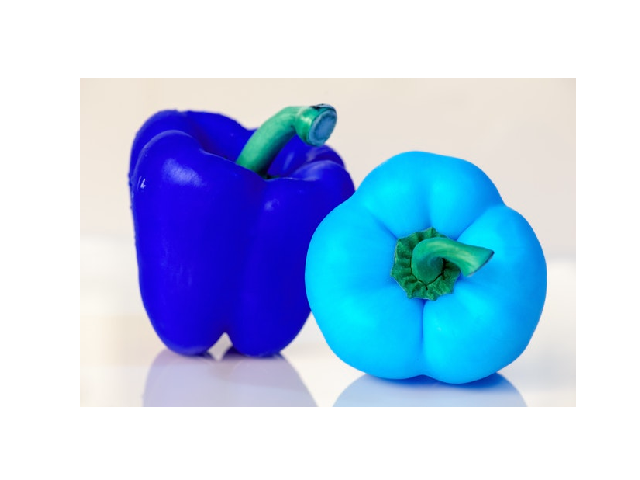

<IPython.core.display.Javascript object>


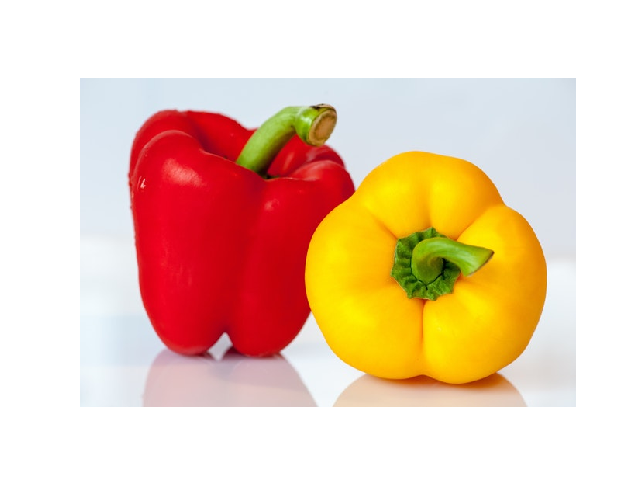

In [15]:
%matplotlib notebook
plt.figure(1)
plt.imshow(peppers)
plt.xticks([]), plt.yticks([])
for spine in plt.gca().spines.values():  #hide image border
    spine.set_visible(False)
plt.show()
peppers = cv2.cvtColor(peppers, cv2.COLOR_BGR2RGB)
plt.figure('peppersrgb')
plt.imshow(peppers)
plt.xticks([]), plt.yticks([])
for spine in plt.gca().spines.values():  #hide image border
    spine.set_visible(False)
plt.show()

Representando imagenes en escala de gris y transformación

<IPython.core.display.Javascript object>


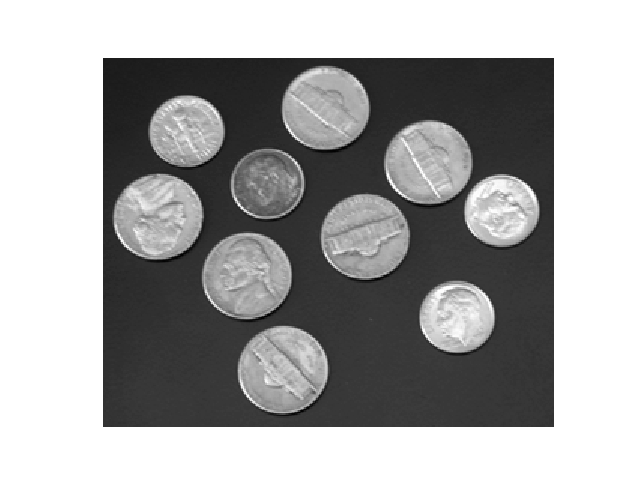

<IPython.core.display.Javascript object>


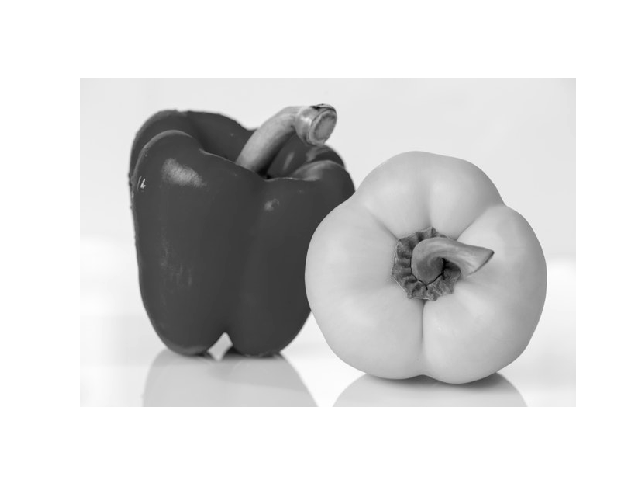

In [16]:
plt.figure('coins')
plt.imshow(coins, cmap = 'gray')
plt.xticks([]), plt.yticks([])
for spine in plt.gca().spines.values():  #hide image border
    spine.set_visible(False)
plt.show()

peppersgray = cv2.cvtColor(peppers, cv2.COLOR_RGB2GRAY)

plt.figure('peppersgray')
plt.imshow(peppersgray, cmap = 'gray')
plt.xticks([]), plt.yticks([])
for spine in plt.gca().spines.values():  #hide image border
    spine.set_visible(False)
plt.show()

-	Extraer la componente roja de  'peppers.png' y visualizarla. Justifique el resultado obtenido teniendo en cuenta la imagen true color. Comente las diferencias/similitudes de intensidad con la imagen de luminancia obtenida en el ítem anterior.

<IPython.core.display.Javascript object>


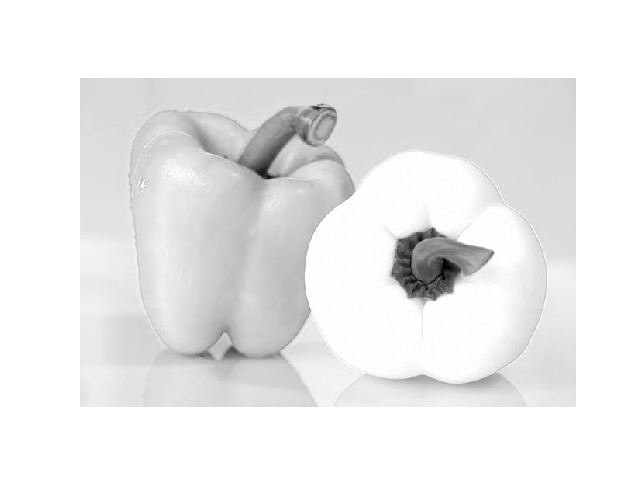

In [19]:
R, G, B = cv2.split(peppers)
plt.figure('peppersR')
plt.imshow(R, cmap = 'gray')
plt.xticks([]), plt.yticks([])
for spine in plt.gca().spines.values():  #hide image border
    spine.set_visible(False)
plt.show()

-	Obtener el negativo de la componente roja y, con ella, volver a componer la imagen RGB y visualizar el resultado. Justifique los cambios de color respecto a la imagen original (tenga en cuenta la carta de mezcla aditiva de fuentes de luz).

<IPython.core.display.Javascript object>


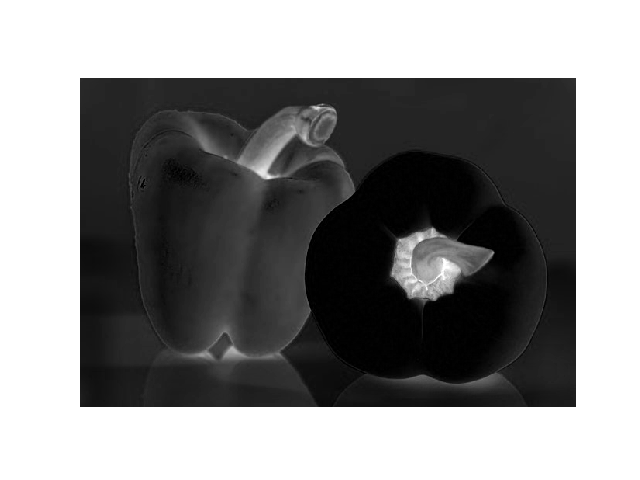

<IPython.core.display.Javascript object>


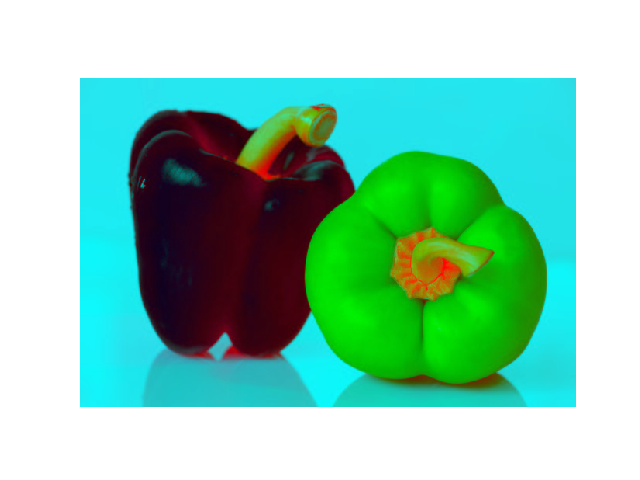

In [20]:
Rinv = 255-R
plt.figure('Rneg')
plt.imshow(Rinv, cmap = 'gray')
plt.xticks([]), plt.yticks([])
for spine in plt.gca().spines.values():  #hide image border
    spine.set_visible(False)
plt.show()

peppersRGBinv = cv2.merge((Rinv,G,B))
plt.figure('peppersnew')
plt.imshow(peppersRGBinv)
plt.xticks([]), plt.yticks([])
for spine in plt.gca().spines.values():  #hide image border
    spine.set_visible(False)
plt.show()

II. Histograma y umbralización  

El histograma de una imagen permite observar cuantitativamente el efecto que los operadores aplicados tienen sobre la distribución de niveles de intensidad; de ahí el interés de saber representarlo e interpretarlo. La función que ofrece MATLAB para este fin es imhist.

Cargue la imagen ‘coins.png’, visualícela y represente su histograma con selección automática del rango en el eje vertical. ¿Cuántas crestas se pueden identificar en su histograma? 

<IPython.core.display.Javascript object>


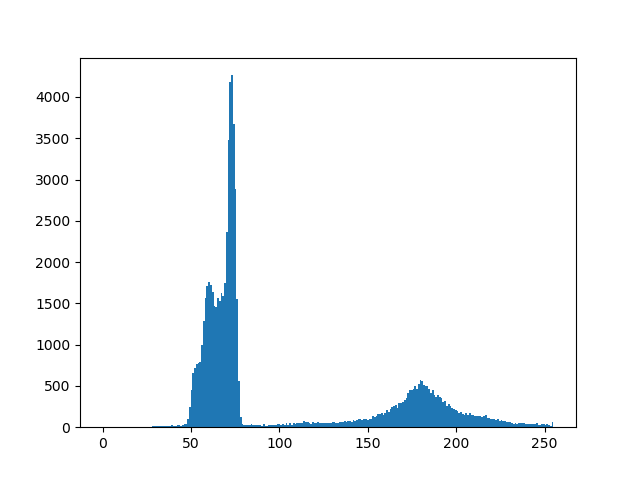

In [22]:
plt.figure('histogram')
plt.hist(coins.ravel(),256,[0,255])
plt.show()

Identifique en la imagen ‘coins.png’ qué grupo de píxeles corresponde a cada cresta y determine un nivel umbral que permita separar adecuadamente las monedas del resto. Justifique el valor seleccionado y utilícelo para umbralizar la imagen con el comando im2bw, mostrando en una figura el resultado obtenido. Comente el resultado y proponga un procedimiento automático (de los presentados en las sesiones teóricas) para determinar el número de monedas.

<IPython.core.display.Javascript object>


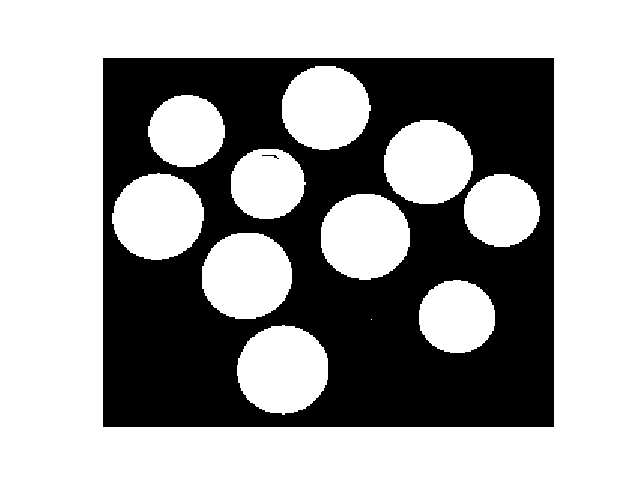

In [24]:
[thresh, imgbi] = cv2.threshold(coins, 90, 1, cv2.THRESH_BINARY)

plt.figure('coinsbinary')
plt.imshow(imgbi, cmap = 'gray')
plt.xticks([]), plt.yticks([])
for spine in plt.gca().spines.values():  #hide image border
    spine.set_visible(False)
plt.show()

Utilice la instrucción  graythresh para obtener automáticamente un valor umbral utilizando el método de Otsu. Haga uso de la ayuda de MATLAB para explicar en qué consiste  el criterio seguido por el método de Otsu para elegir el umbral. Aplique el umbral obtenido sobre la imagen ‘coins.png’ y analice/justifique las diferencias con el resultado de la umbralización obtenida aplicando el procedimiento del párrafo anterior

<IPython.core.display.Javascript object>


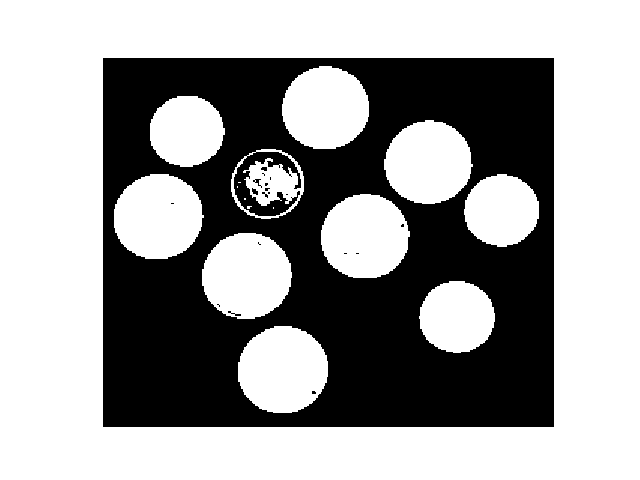

In [25]:
[thresh, imgotsu] = cv2.threshold(coins, 127, 1, cv2.THRESH_OTSU)
plt.figure('otsu')
plt.imshow(imgotsu, cmap = 'gray')
plt.xticks([]), plt.yticks([])
for spine in plt.gca().spines.values():  #hide image border
    spine.set_visible(False)
plt.show()

III. Ruido y filtrado espacial  

Para observar la efectividad del filtrado espacial conviene trabajar con imágenes reales o con imágenes sintéticas contaminadas con alguna fuente de ruido. MATLAB permite degradar la calidad de una imagen considerando ruido de distinta naturaleza mediante la función imnoise. En esta práctica trabajaremos con tres fuentes de ruido: 'gaussian', 'salt & pepper' y 'speckle'.


Considere las fuentes de ruido 'gaussian' y 'speckle' y contamine con ellas una imagen sintética de intensidad uniforme y luminancia 128. Considere que la imagen es cuadrada y de tamaño 256x256 píxeles. Indique y justifique la secuencia de comandos utilizada, tanto para generar la imagen como para añadir ruido. Tenga en cuenta que la matriz que representa la imagen debe ser de tipo uint8. En los dos casos, considere que la potencia media de ruido es 0.02.

[[128 128 128 ... 128 128 128]
 [128 128 128 ... 128 128 128]
 [128 128 128 ... 128 128 128]
 ...
 [128 128 128 ... 128 128 128]
 [128 128 128 ... 128 128 128]
 [128 128 128 ... 128 128 128]]


<IPython.core.display.Javascript object>


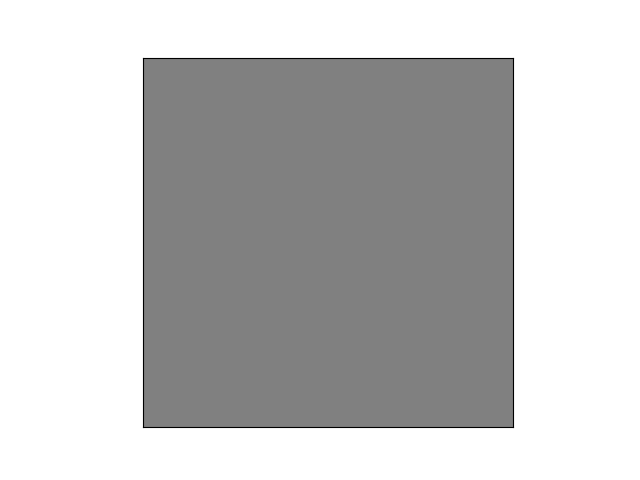

<IPython.core.display.Javascript object>


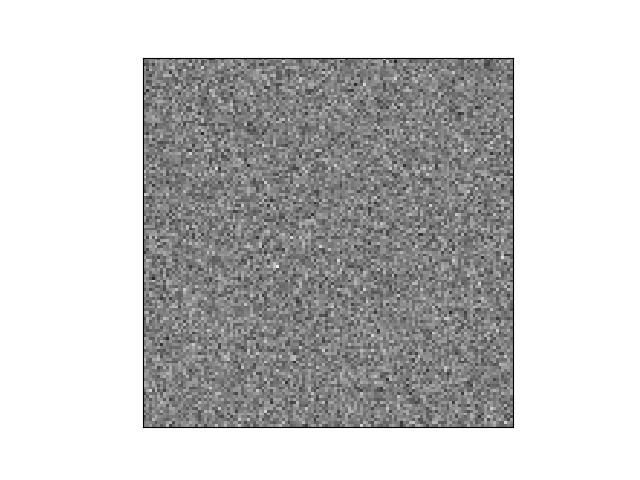

<IPython.core.display.Javascript object>


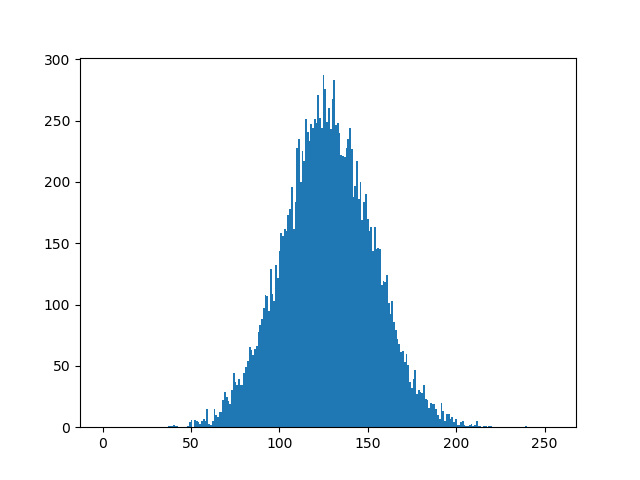

True

In [29]:
blank = np.ones((128, 128), dtype=np.uint8)*128
print(blank)
plt.figure('blank')
plt.imshow(blank, cmap = 'gray', vmin = 0, vmax = 255)
plt.xticks([]), plt.yticks([])
plt.show()

#generar ruido blanco

whitenoise = imf.imnoise(blank,"gauss", [0,0.01])
plt.figure('white noise')
plt.imshow(whitenoise, cmap = 'gray', vmin = 0, vmax = 255)
plt.xticks([]), plt.yticks([])
plt.show()

plt.figure()
plt.hist(whitenoise.ravel(),256,[0,255])
plt.show()

cv2.imwrite('whitenoise.png',whitenoise)

<IPython.core.display.Javascript object>


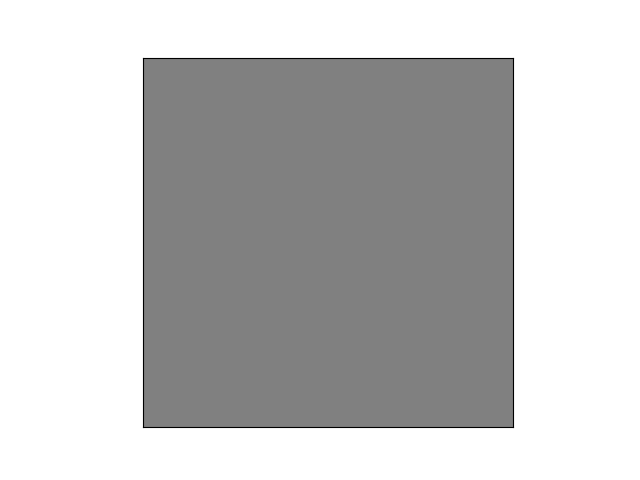

<IPython.core.display.Javascript object>


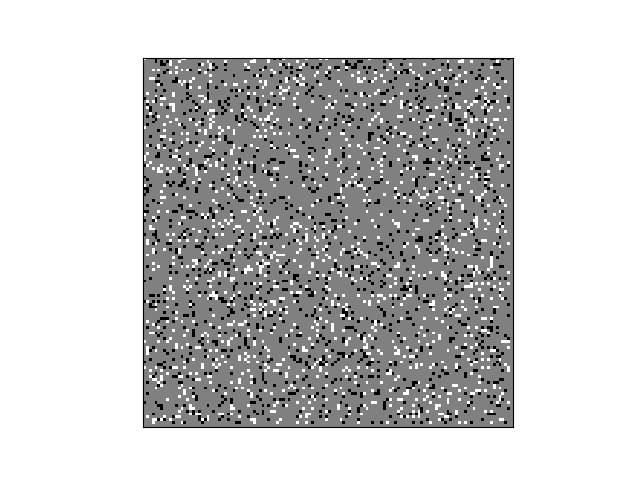

<IPython.core.display.Javascript object>


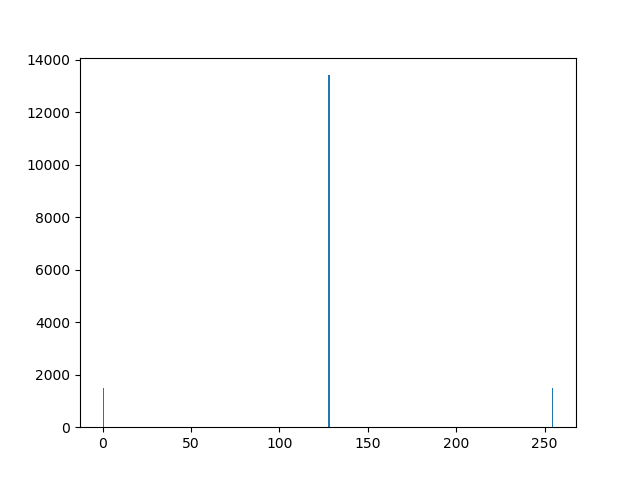

In [30]:
plt.figure('blank2')
plt.imshow(blank, cmap = 'gray', vmin = 0, vmax = 255)
plt.xticks([]), plt.yticks([])
plt.show()

blanksp = imf.imnoise(blank,"sandp", 0.2)
plt.figure('salt and pepper')
plt.imshow(blanksp, cmap = 'gray')
plt.xticks([]), plt.yticks([])
plt.show()

plt.figure()
plt.hist(blanksp.ravel(),256,[0,255])
plt.show()

Filtrado lineal

Si un operador local efectúa una transformación lineal, su comportamiento puede definirse completamente mediante la respuesta h[n,m] al impulso. Si h[n,m] es rectangular y simétrica respecto de su origen, su aplicación sobre la imagen (es decir, la operación de convolución) puede efectuarse aplicando la máscara w[n,m] = h[−n,−m] sobre cada píxel de la imagen original.

MATLAB ofrece la función imfilter para llevar a cabo la operación de filtrado lineal, para lo cual toma como parámetros la imagen original y la máscara de filtrado. La imagen resultante es del mismo tipo que la imagen original (double, uint8, uint16, etc.).

Teniendo en cuenta lo anterior, defina una máscara de suavizado de tamaño 5x5 tal que garantice que no se modifica el rango dinámico de la imagen. Indique y justifique la secuencia de comandos utilizada.



In [31]:
kernel = np.ones((5,5),np.float32)/(5*5)

Aplique la máscara anterior a la imagen sintética contaminada con ruido de naturaleza gaussiana. Considere dos tipos de filtrado: (a) aplicando la función imfilter con dos argumentos de entrada (imagen y máscara); (b) considerando simultáneamente como opciones de filtrado 'symmetric' y 'same'. Indique la secuencia de comandos utilizada en cada caso, representando las imágenes filtradas y sus histogramas. Comente y justifique las similitudes y diferencias (tanto en las imágenes como en los histogramas asociados).

Repita el procedimiento del párrafo anterior con las opciones de filtrado (b) y las fuentes de ruido de tipo 'salt & pepper' y 'speckle'.


<IPython.core.display.Javascript object>


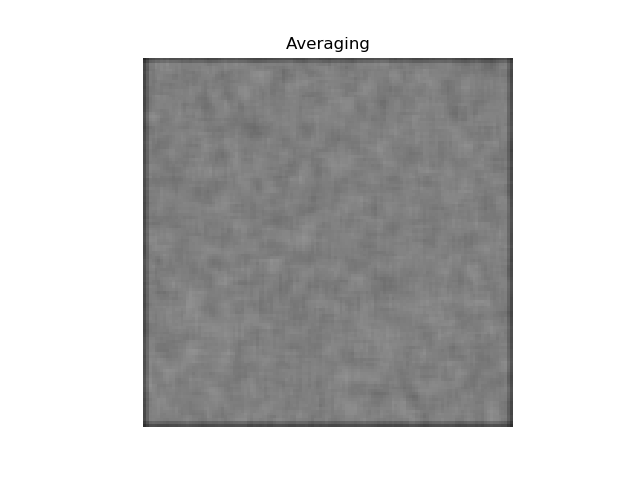

In [33]:
whitefilter = cv2.filter2D(whitenoise, -1, kernel, borderType= cv2.BORDER_CONSTANT)
plt.figure()
plt.imshow(whitefilter, cmap = 'gray', vmin = 0, vmax = 255),plt.title('Averaging')
plt.xticks([]), plt.yticks([])
for spine in plt.gca().spines.values():  #hide image border
    spine.set_visible(False)
plt.show()

<IPython.core.display.Javascript object>


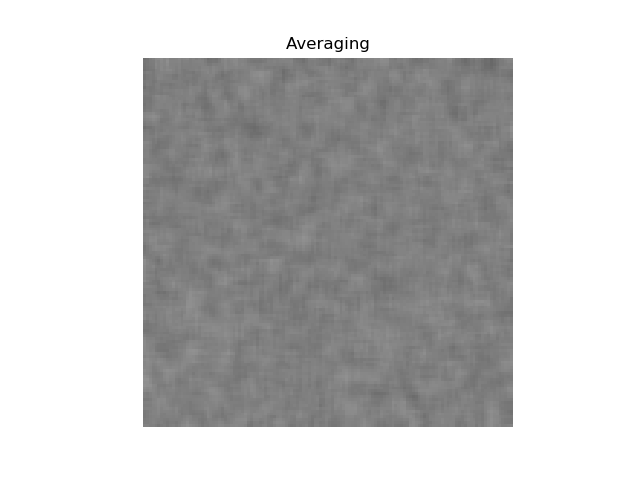

In [34]:
reflectpadding = cv2.filter2D(whitenoise, -1, kernel, borderType= cv2.BORDER_REFLECT)
plt.figure()
plt.imshow(reflectpadding, cmap = 'gray', vmin = 0, vmax = 255),plt.title('Averaging')
plt.xticks([]), plt.yticks([])
for spine in plt.gca().spines.values():  #hide image border
    spine.set_visible(False)
plt.show()

Filtrado no lineal

Uno de los filtros no lineales más utilizados es el filtro de mediana, que asigna a cada píxel de la imagen procesada la mediana de los niveles de intensidad de los píxeles situados en un entorno local (máscara espacial). MATLAB permite aplicar este tipo de filtrado con la instrucción  medfilt2. 
Utilice una máscara de tamaño 5x5 para aplicar un filtrado de mediana sobre todas las imágenes sintéticas anteriores contaminadas con ruido. Considere como opción de filtrado 'symmetric'. Indique la secuencia de comandos utilizada. Comente y justifique los resultados, considerando tanto las imágenes filtradas como sus correspondientes histogramas. Compare los resultados con los obtenidos al aplicar el filtro lineal. Extraiga conclusiones.

<IPython.core.display.Javascript object>


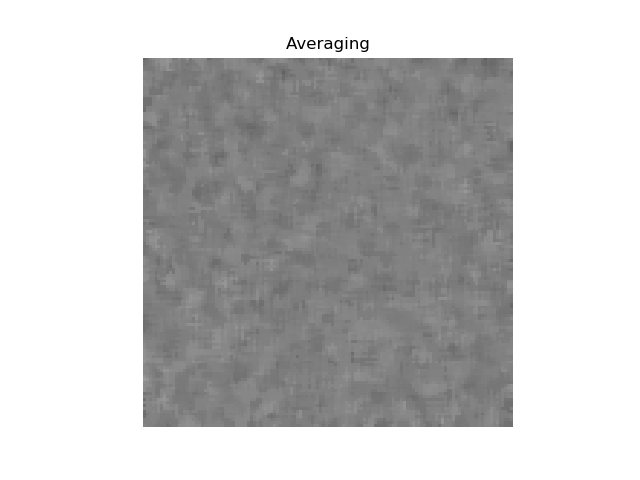

<IPython.core.display.Javascript object>


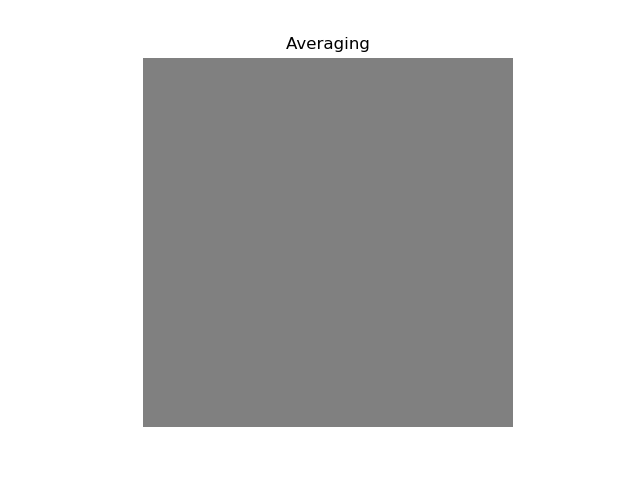

In [37]:
gaussianmedian = cv2.medianBlur(whitenoise, 5)
sandpmedian = cv2.medianBlur(blanksp, 5)
plt.figure('median white')
plt.imshow(gaussianmedian, cmap = 'gray', vmin = 0, vmax = 255),plt.title('Averaging')
plt.xticks([]), plt.yticks([])
for spine in plt.gca().spines.values():  #hide image border
    spine.set_visible(False)
plt.show()

plt.figure('sp median')
plt.imshow(sandpmedian, cmap = 'gray', vmin = 0, vmax = 255),plt.title('Averaging')
plt.xticks([]), plt.yticks([])
for spine in plt.gca().spines.values():  #hide image border
    spine.set_visible(False)
plt.show()

IV. Extracción de contornos 

Considere ahora la imagen ‘coins.png’. Se desea extraer sólo los contornos exteriores de las monedas, de modo que éstos sean píxeles de primer plano de una imagen binaria de tipo uint8. Proponga un procedimiento que únicamente considere la aplicación de operadores puntuales y filtros lineales con las máscaras presentadas en las clases teóricas. 

Indique y justifique la secuencia de instrucciones aplicadas para implementar el procedimiento propuesto. Comente y justifique los resultados obtenidos, presentando la solución obtenida.

